In [11]:
# All the csvs we are reading in has exactly 25 rows
# every 5 row correspond to a particular (# of function, # of DE) combination.
# Which gives us 20 different combos in total.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up list for API numbers
block_num_list = ["5", "10", "50", "100"]

# Set labels for the x-axis
num_DE = ["10", "100", "500", "1000", "5000"]

# set_up median overhead array for all number of APIs
med_array_all = []

In [12]:
for block_num in block_num_list:
    num_func_name = "block" + block_num
    input_file_path = num_func_name + ".csv"
    output_figure_path = num_func_name + ".png"
    raw_df = pd.read_csv(input_file_path, header=None)
    raw_arr = np.array(raw_df).reshape(5, 5, 5)
    med_array = []
    for i in range(5):
        cur_med = np.median(raw_arr[i], axis=0)
        med_array.append(cur_med)
    med_array = np.transpose(med_array)
    # Transform the med_array: we only want to keep two components of overhead
    # 1) get accessible DE, 2) others
    med_array[0] = med_array[0]+med_array[2]+med_array[3]+med_array[4]
    med_array = med_array[:2]
    med_array_all.append(med_array)

In [13]:
med_array_all[0]

array([[0.01786089, 0.01883602, 0.02836633, 0.07093692, 0.1904304 ],
       [0.01038527, 0.01500583, 0.0501101 , 0.23166251, 0.63064003]])

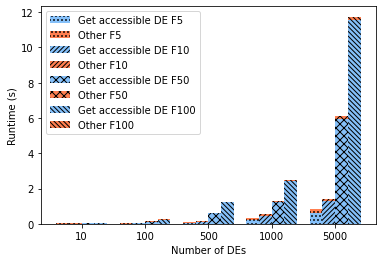

In [17]:
num_DE_axis = np.arange(len(num_DE))
hatches = ['...','/////','///\\\\\\','\\\\\\\\\\']

for i in range(len(block_num_list)):
    label_one = 'Get accessible DE F'+block_num_list[i]
    label_two = 'Other F'+block_num_list[i]
    plt.bar(num_DE_axis-0.3+i*0.2,
            med_array_all[i][1],
            label=label_one,
            width=0.2,
            color="#85C0F9",
            hatch=hatches[i],)
    plt.bar(num_DE_axis-0.3+i*0.2,
            med_array_all[i][0],
            bottom=med_array_all[i][1],
            label=label_two,
            width=0.2,
            color="coral",
            hatch=hatches[i])

plt.xticks(num_DE_axis, num_DE)
plt.xlabel("Number of DEs")
plt.ylabel("Runtime (s)")
plt.legend()
plt.savefig("test_user.png", facecolor='w')